# Airbnb price (Exploratory Dataset Analysis)

## David Santiago Buitrago Prada

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("paramvir705/airbnb-data")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\BUITRAGOD\.cache\kagglehub\datasets\paramvir705\airbnb-data\versions\1


In [ ]:
import os
print(os.listdir(path))

['Airbnb_Data.csv']


In [ ]:
df = pd.read_csv(os.path.join(path, "Airbnb_Data.csv"))
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


Antes de empezar con el análisis es importante verificar la calidad de los datos para evitar registros nulos.

In [ ]:
df.isnull().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64

Teniendo en cuenta los registros nulos y la relevancia para el análisis del precio se eliminan las siguientes columnas: 'first_review', 'bed_type','cancellation_policy', 'first_review', 'host_has_profile_pic', 'host_identity_verified','host_response_rate', 'host_since', 'last_review', 'neighbourhood', 'thumbnail_url', 'zipcode', 'latitude', 'longitude', 'description', 'instant_bookable', 'name', 'id', 'amenities'.

In [ ]:
columns_to_delete = ['first_review', 'bed_type','cancellation_policy', 'first_review', 'host_has_profile_pic', 'host_identity_verified','host_response_rate', 'host_since', 'last_review', 'neighbourhood', 'thumbnail_url', 'zipcode', 'latitude', 'longitude', 'description', 'instant_bookable', 'name', 'id', 'amenities']
df_n = df.drop(columns_to_delete, axis=1)
df_n

,log_price,property_type,room_type,accommodates,bathrooms,cleaning_fee,city,number_of_reviews,review_scores_rating,bedrooms,beds
0,5.010635,Apartment,Entire home/apt,3,1.0,True,NYC,2,100.0,1.0,1.0
1,5.129899,Apartment,Entire home/apt,7,1.0,True,NYC,6,93.0,3.0,3.0
2,4.976734,Apartment,Entire home/apt,5,1.0,True,NYC,10,92.0,1.0,3.0
3,6.620073,House,Entire home/apt,4,1.0,True,SF,0,NaN,2.0,2.0
4,4.744932,Apartment,Entire home/apt,2,1.0,True,DC,4,40.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
74106,4.605170,Apartment,Private room,1,1.0,False,NYC,0,NaN,1.0,1.0
74107,5.043425,Apartment,Entire home/apt,4,2.0,True,LA,16,93.0,2.0,4.0
74108,5.220356,Apartment,Entire home/apt,5,1.0,True,NYC,43,94.0,2.0,2.0
74109,5.273000,Apartment,Entire home/apt,2,1.0,True,NYC,0,NaN,0.0,2.0


Para las columnas: 'review_scores_rating', 'bedrooms', 'beds' que todavía contienen registros nulos se descartan estos registros del análisis

In [ ]:
df_n.dropna(axis=0, inplace=True)

## Diccionario de variables

In [ ]:
df_n.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57129 entries, 0 to 74110
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   log_price             57129 non-null  float64
 1   property_type         57129 non-null  object 
 2   room_type             57129 non-null  object 
 3   accommodates          57129 non-null  int64  
 4   bathrooms             57129 non-null  float64
 5   cleaning_fee          57129 non-null  bool   
 6   city                  57129 non-null  object 
 7   number_of_reviews     57129 non-null  int64  
 8   review_scores_rating  57129 non-null  float64
 9   bedrooms              57129 non-null  float64
 10  beds                  57129 non-null  float64
dtypes: bool(1), float64(5), int64(2), object(3)
memory usage: 4.8+ MB


# Análisis descriptivo: Univariado

## Precio de alquiler

Para el análisis inicial del precio se emplea la transformación exp(log_price).

In [39]:
price = np.exp(df_n['log_price'])
price.describe()

count    57129.000000
mean       147.875212
std        134.628386
min          1.000000
25%         74.000000
50%        110.000000
75%        175.000000
max       1999.000000
Name: log_price, dtype: float64

In [40]:
price =(df_n['log_price'])
price.describe()

count    57129.000000
mean         4.749983
std          0.668902
min          0.000000
25%          4.304065
50%          4.700480
75%          5.164786
max          7.600402
Name: log_price, dtype: float64

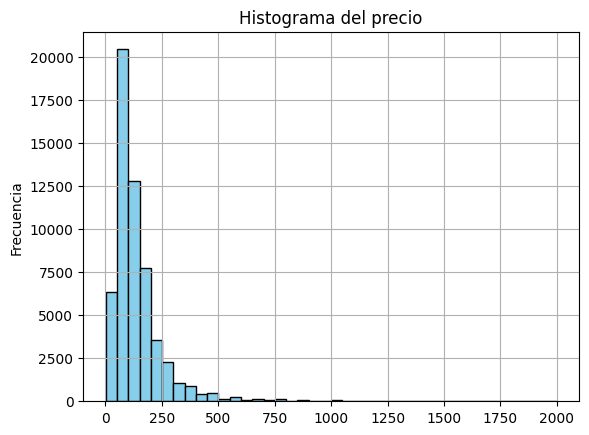

In [41]:
plt.hist(np.exp(df_n['log_price']), bins=40, color='skyblue', edgecolor='black')
plt.ylabel('Frecuencia')
plt.title('Histograma del precio')
plt.grid(True)
plt.show()

Dado que según el histograma la distribución del precio no es simétrica, es posible argumentar que no se distribuye normalmente sino exponencial, dificultando el análisis y la construcción de un modelo lineal. 

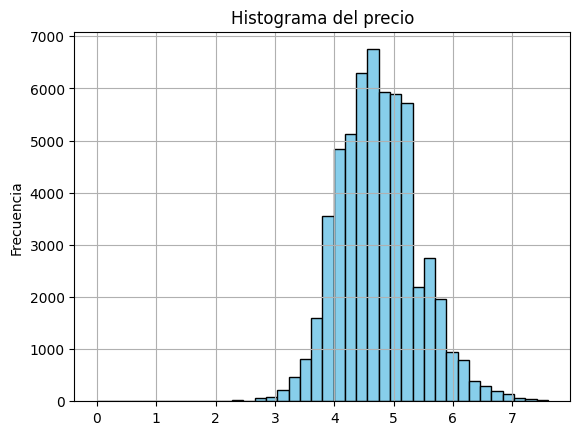

In [42]:
plt.hist(df_n['log_price'], bins=40, color='skyblue', edgecolor='black')
plt.ylabel('Frecuencia')
plt.title('Histograma del precio')
plt.grid(True)
plt.show()

Posterior a la transformación los datos están mucho mejor agrupados.

Precio del alquiler agrupado por ciudad

In [43]:
# Agrupar por ciudad tomando únicamente la columna numérica 'log_price'
precio_ciudad = df_n.groupby('city')['log_price'].mean()
# ordenar por el valor medio de log_price
precio_ciudad = precio_ciudad.sort_values()
# convertir a escala de precio (USD) si se desea visualizar
np.exp(precio_ciudad)


city
Chicago     98.343272
LA         110.030404
NYC        111.064085
DC         121.284577
Boston     129.537903
SF         166.487693
Name: log_price, dtype: float64

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Chicago'),
  Text(1, 0, 'LA'),
  Text(2, 0, 'NYC'),
  Text(3, 0, 'DC'),
  Text(4, 0, 'Boston'),
  Text(5, 0, 'SF')])

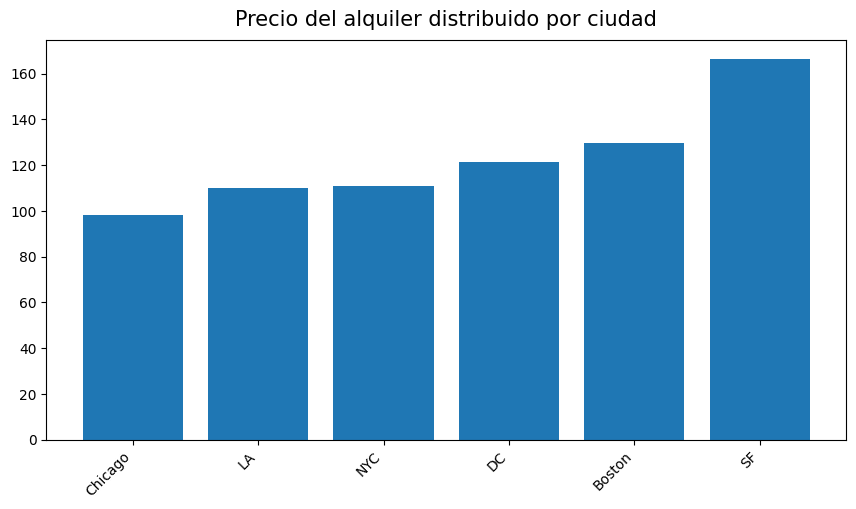

In [44]:
fig = plt.figure(figsize=(8,4))
eje = fig.add_axes([0,0,1,1])
# precio_ciudad es una Series con el promedio de log_price por ciudad
eje.bar(precio_ciudad.index, np.exp(precio_ciudad))
eje.set_title('Precio del alquiler distribuido por ciudad', fontsize=15, pad= 10)
# rotar etiquetas para legibilidad
plt.xticks(rotation=45, ha='right')

## Rango de precios por tipo de apartamento

In [45]:
df_r = df_n.groupby('room_type')
df_r.size()

room_type
Entire home/apt    32900
Private room       22796
Shared room         1433
dtype: int64

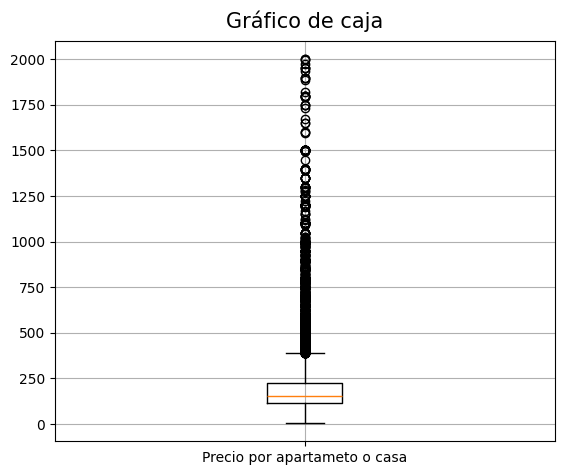

In [46]:
df_entire = df_n[df_n['room_type'] == 'Entire home/apt']
fig = plt.figure(figsize= (5,4))
eje = fig.add_axes([0,0,1,1])
eje.boxplot(np.exp(df_entire['log_price']))
eje.set_title('Gráfico de caja', fontsize= 15, pad = 10)
eje.set_xticklabels(['Precio por apartameto o casa'])
plt.grid(True)

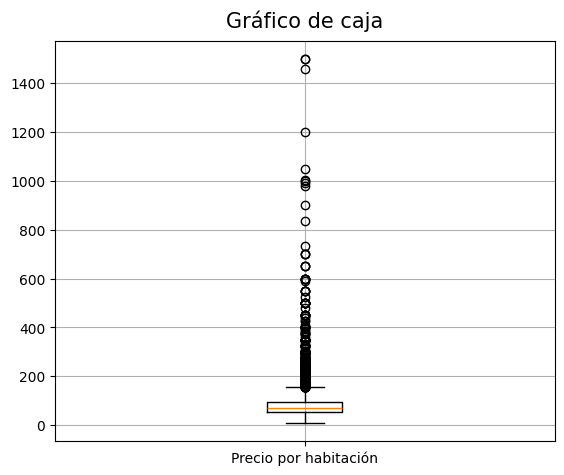

In [47]:
df_private = df_n[df_n['room_type'] == 'Private room']
fig = plt.figure(figsize= (5,4))
eje = fig.add_axes([0,0,1,1])
eje.boxplot(np.exp(df_private['log_price']))
eje.set_title('Gráfico de caja', fontsize= 15, pad = 10)
eje.set_xticklabels(['Precio por habitación'])
plt.grid(True)

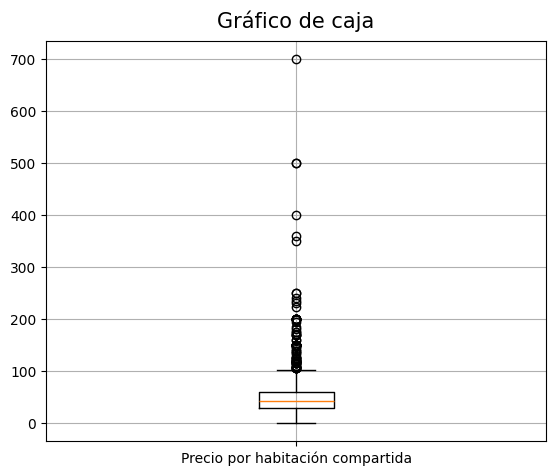

In [48]:
df_shared = df_n[df_n['room_type'] == 'Shared room']
fig = plt.figure(figsize= (5,4))
eje = fig.add_axes([0,0,1,1])
eje.boxplot(np.exp(df_shared['log_price']))
eje.set_title('Gráfico de caja', fontsize= 15, pad = 10)
eje.set_xticklabels(['Precio por habitación compartida'])
plt.grid(True)

In [49]:
np.exp(df_entire['log_price']).mean(), np.exp(df_shared['log_price']).mean(), np.exp(df_private['log_price']).mean()

(np.float64(198.33635258358663),
 np.float64(51.92323796231682),
 np.float64(81.07961923144411))

Dada la gran cantidad de valores atípicos se regresa la transformación del precio para normalizar la escala

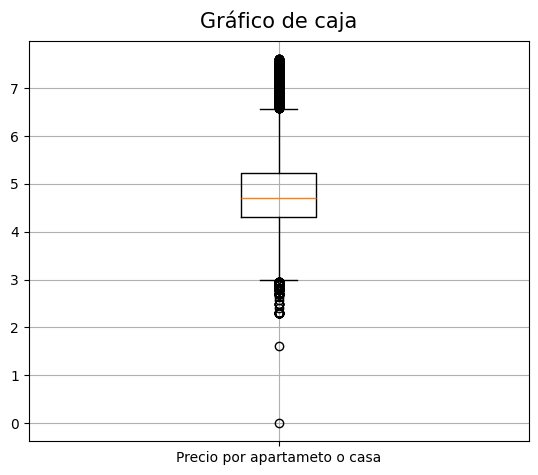

In [50]:
df_entire = df_n[df_n['room_type'] == 'Entire home/apt']
fig = plt.figure(figsize= (5,4))
eje = fig.add_axes([0,0,1,1])
eje.boxplot(df['log_price'])
eje.set_title('Gráfico de caja', fontsize= 15, pad = 10)
eje.set_xticklabels(['Precio por apartameto o casa'])
plt.grid(True)

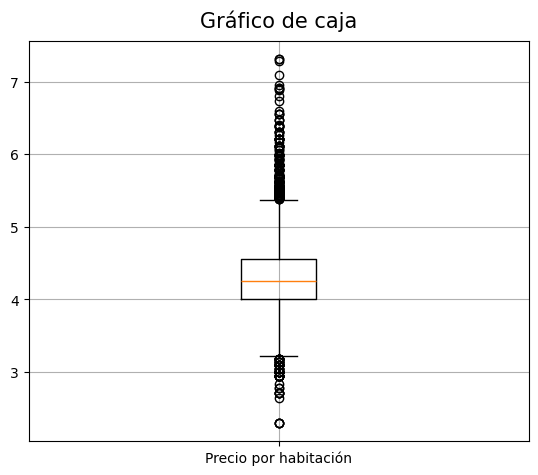

In [51]:
df_private = df_n[df_n['room_type'] == 'Private room']
fig = plt.figure(figsize= (5,4))
eje = fig.add_axes([0,0,1,1])
eje.boxplot(df_private['log_price'])
eje.set_title('Gráfico de caja', fontsize= 15, pad = 10)
eje.set_xticklabels(['Precio por habitación'])
plt.grid(True)

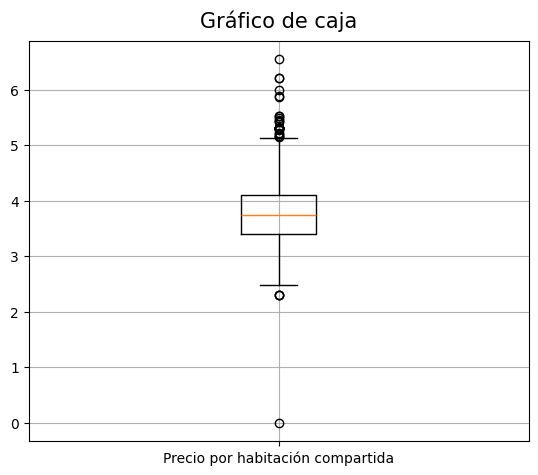

In [52]:
df_shared = df_n[df_n['room_type'] == 'Shared room']
fig = plt.figure(figsize= (5,4))
eje = fig.add_axes([0,0,1,1])
eje.boxplot(df_shared['log_price'])
eje.set_title('Gráfico de caja', fontsize= 15, pad = 10)
eje.set_xticklabels(['Precio por habitación compartida'])
plt.grid(True)

# Análisis bivariado

Relación entre el precio y la media de las calificaciones en línea

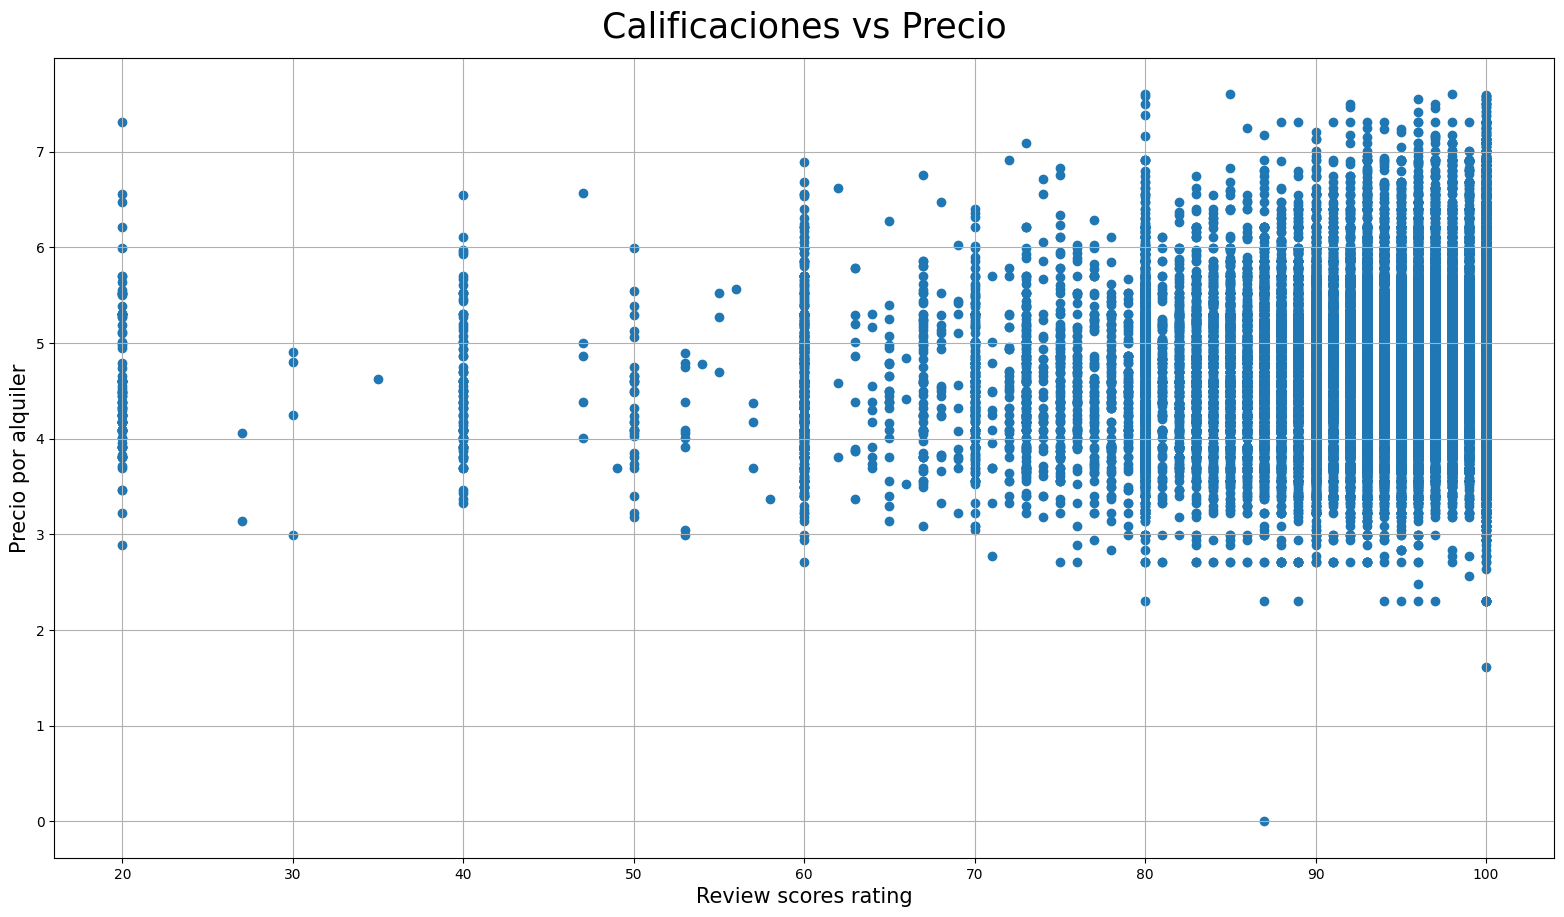

In [53]:
fig = plt.figure(figsize= (15,8))
eje = fig.add_axes([0,0,1,1])
eje.scatter(df_n['review_scores_rating'],df_n['log_price'])
eje.set_title('Calificaciones vs Precio', fontsize= 25, pad= 15)
eje.set_xlabel('Review scores rating', fontsize = 15)
eje.set_ylabel('Precio por alquiler', fontsize = 15)
eje.grid(True)

Relación entre el precio y el número de calificaciones en línea

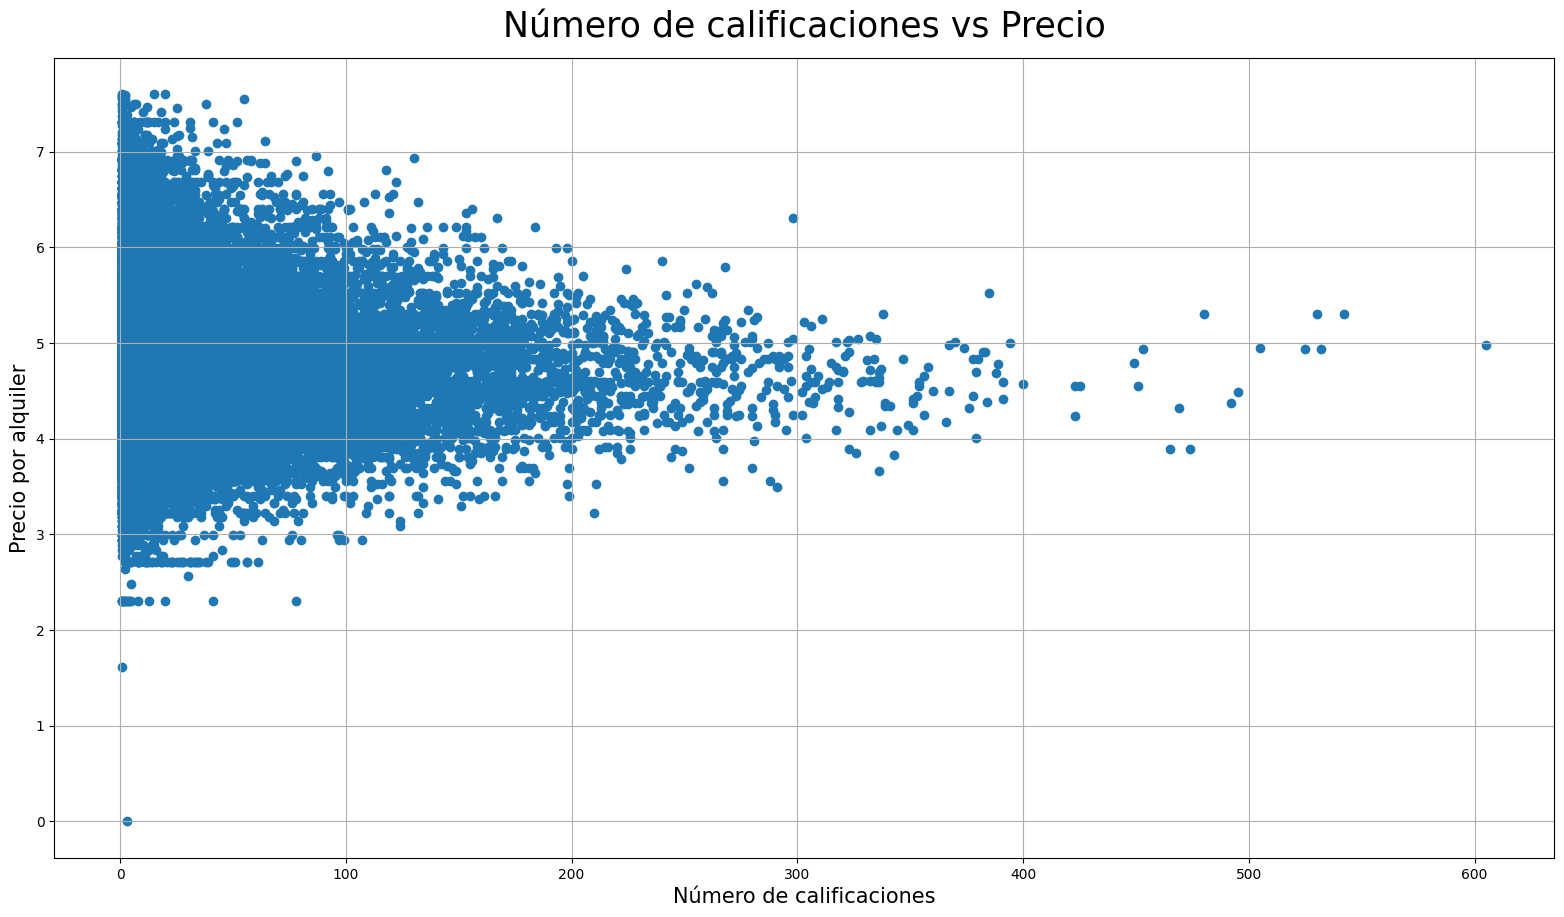

In [54]:
fig = plt.figure(figsize= (15,8))
eje = fig.add_axes([0,0,1,1])
eje.scatter(df_n['number_of_reviews'],df_n['log_price'])
eje.set_title('Número de calificaciones vs Precio', fontsize= 25, pad= 15)
eje.set_xlabel('Número de calificaciones', fontsize = 15)
eje.set_ylabel('Precio por alquiler', fontsize = 15)
eje.grid(True)

# Modelo de regresión lineal

Librerías para: creación y entrenamiento del modelo; preprocesamiento y estandarización de los datos; evaluación del modelo.

In [55]:
df_n

,log_price,property_type,room_type,accommodates,bathrooms,cleaning_fee,city,number_of_reviews,review_scores_rating,bedrooms,beds
0,5.010635,Apartment,Entire home/apt,3,1.0,True,NYC,2,100.0,1.0,1.0
1,5.129899,Apartment,Entire home/apt,7,1.0,True,NYC,6,93.0,3.0,3.0
2,4.976734,Apartment,Entire home/apt,5,1.0,True,NYC,10,92.0,1.0,3.0
4,4.744932,Apartment,Entire home/apt,2,1.0,True,DC,4,40.0,0.0,1.0
5,4.442651,Apartment,Private room,2,1.0,True,SF,3,100.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
74104,4.356709,Apartment,Entire home/apt,2,1.0,True,Chicago,6,100.0,1.0,1.0
74105,4.248495,House,Private room,2,1.0,True,LA,36,91.0,1.0,1.0
74107,5.043425,Apartment,Entire home/apt,4,2.0,True,LA,16,93.0,2.0,4.0
74108,5.220356,Apartment,Entire home/apt,5,1.0,True,NYC,43,94.0,2.0,2.0


In [56]:
import math
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [57]:
dummy_df = pd.get_dummies(df_n)
dummy_df

,log_price,accommodates,bathrooms,cleaning_fee,number_of_reviews,review_scores_rating,bedrooms,beds,property_type_Apartment,property_type_Bed & Breakfast,...,property_type_Yurt,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,city_Boston,city_Chicago,city_DC,city_LA,city_NYC,city_SF
0,5.010635,3,1.0,True,2,100.0,1.0,1.0,True,False,...,False,True,False,False,False,False,False,False,True,False
1,5.129899,7,1.0,True,6,93.0,3.0,3.0,True,False,...,False,True,False,False,False,False,False,False,True,False
2,4.976734,5,1.0,True,10,92.0,1.0,3.0,True,False,...,False,True,False,False,False,False,False,False,True,False
4,4.744932,2,1.0,True,4,40.0,0.0,1.0,True,False,...,False,True,False,False,False,False,True,False,False,False
5,4.442651,2,1.0,True,3,100.0,1.0,1.0,True,False,...,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74104,4.356709,2,1.0,True,6,100.0,1.0,1.0,True,False,...,False,True,False,False,False,True,False,False,False,False
74105,4.248495,2,1.0,True,36,91.0,1.0,1.0,False,False,...,False,False,True,False,False,False,False,True,False,False
74107,5.043425,4,2.0,True,16,93.0,2.0,4.0,True,False,...,False,True,False,False,False,False,False,True,False,False
74108,5.220356,5,1.0,True,43,94.0,2.0,2.0,True,False,...,False,True,False,False,False,False,False,False,True,False


Selección de las variables X, Y

In [58]:
X = dummy_df.drop('log_price', axis = 1)
Y = dummy_df['log_price']

Separación de los conjuntos X_train, X_test, Y_train, Y_test

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Estandarización de los datos

In [60]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

Creación del modelo

In [61]:
model = LinearRegression()

Entrenamiento

In [62]:
model.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Predicciones

In [63]:
Y_pred = model.predict(X_test)

In [64]:
Yp = pd.DataFrame(Y_pred)
Yp.describe()

,0
count,11426.000000
mean,4.747334
std,0.521737
min,3.060089
25%,4.293886
50%,4.779003
75%,5.082357
max,7.111439


In [65]:
Yp = pd.DataFrame(Y_pred)
np.exp(Yp).describe()

,0
count,11426.000000
mean,133.598166
std,86.049338
min,21.329456
25%,73.250590
50%,118.985665
75%,161.153490
max,1225.910196


## Visualización del modelo

## Precio vs calificaciones

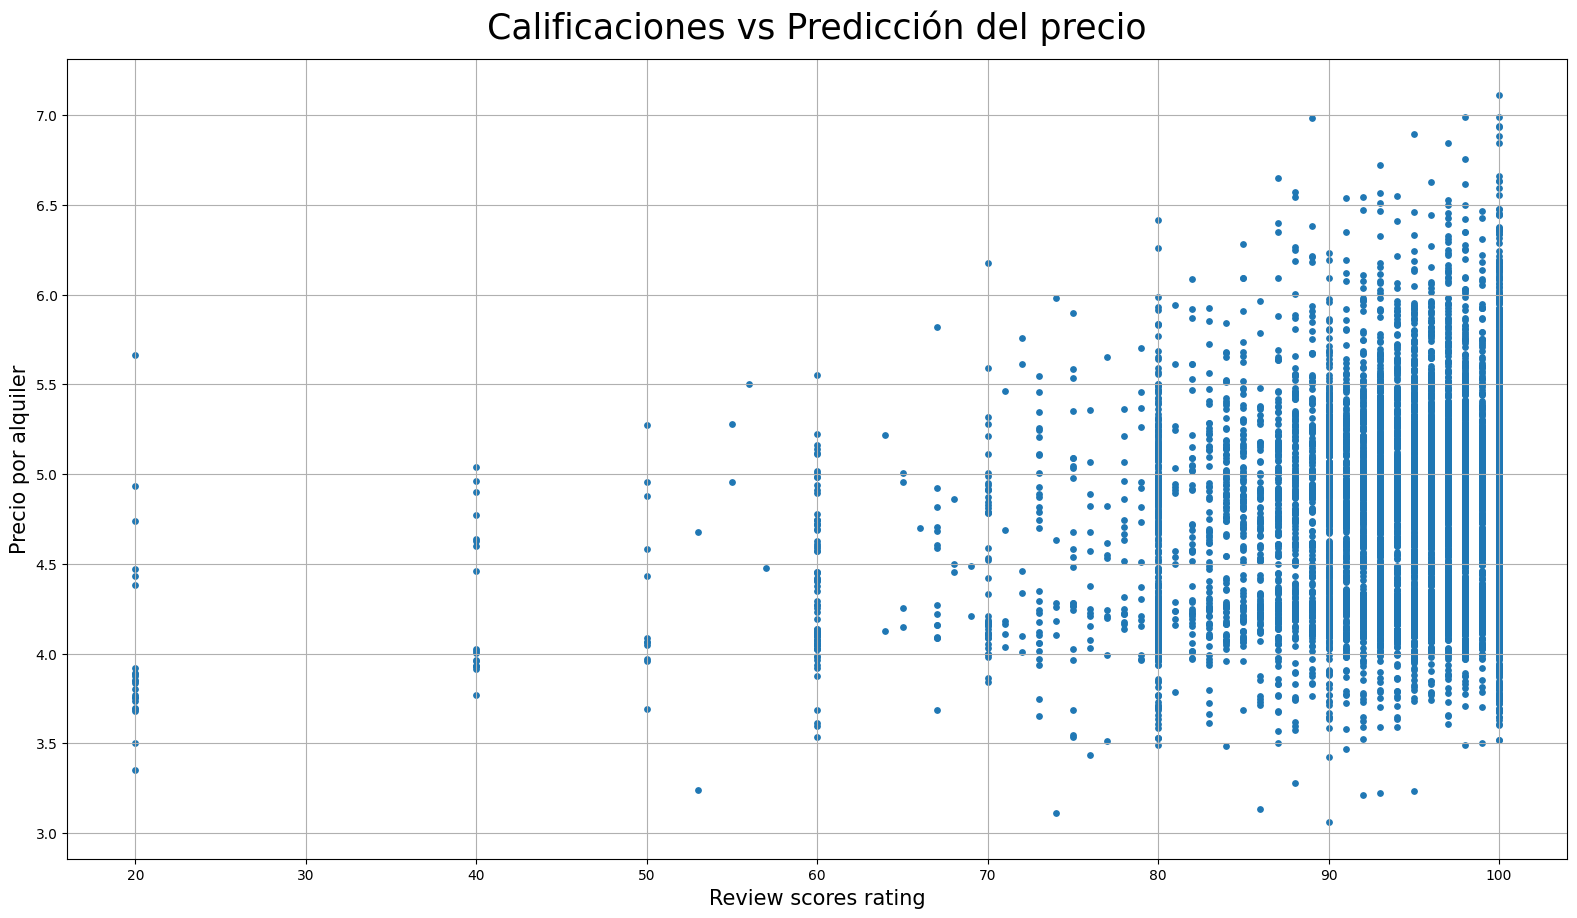

In [66]:
fig = plt.figure(figsize= (15,8))
eje = fig.add_axes([0,0,1,1])
eje.scatter(X_test['review_scores_rating'],Y_pred, s = 15)
eje.set_title('Calificaciones vs Predicción del precio', fontsize= 25, pad= 15)
eje.set_xlabel('Review scores rating', fontsize = 15)
eje.set_ylabel('Precio por alquiler', fontsize = 15)
eje.grid(True)

Comparación con los datos de testeo

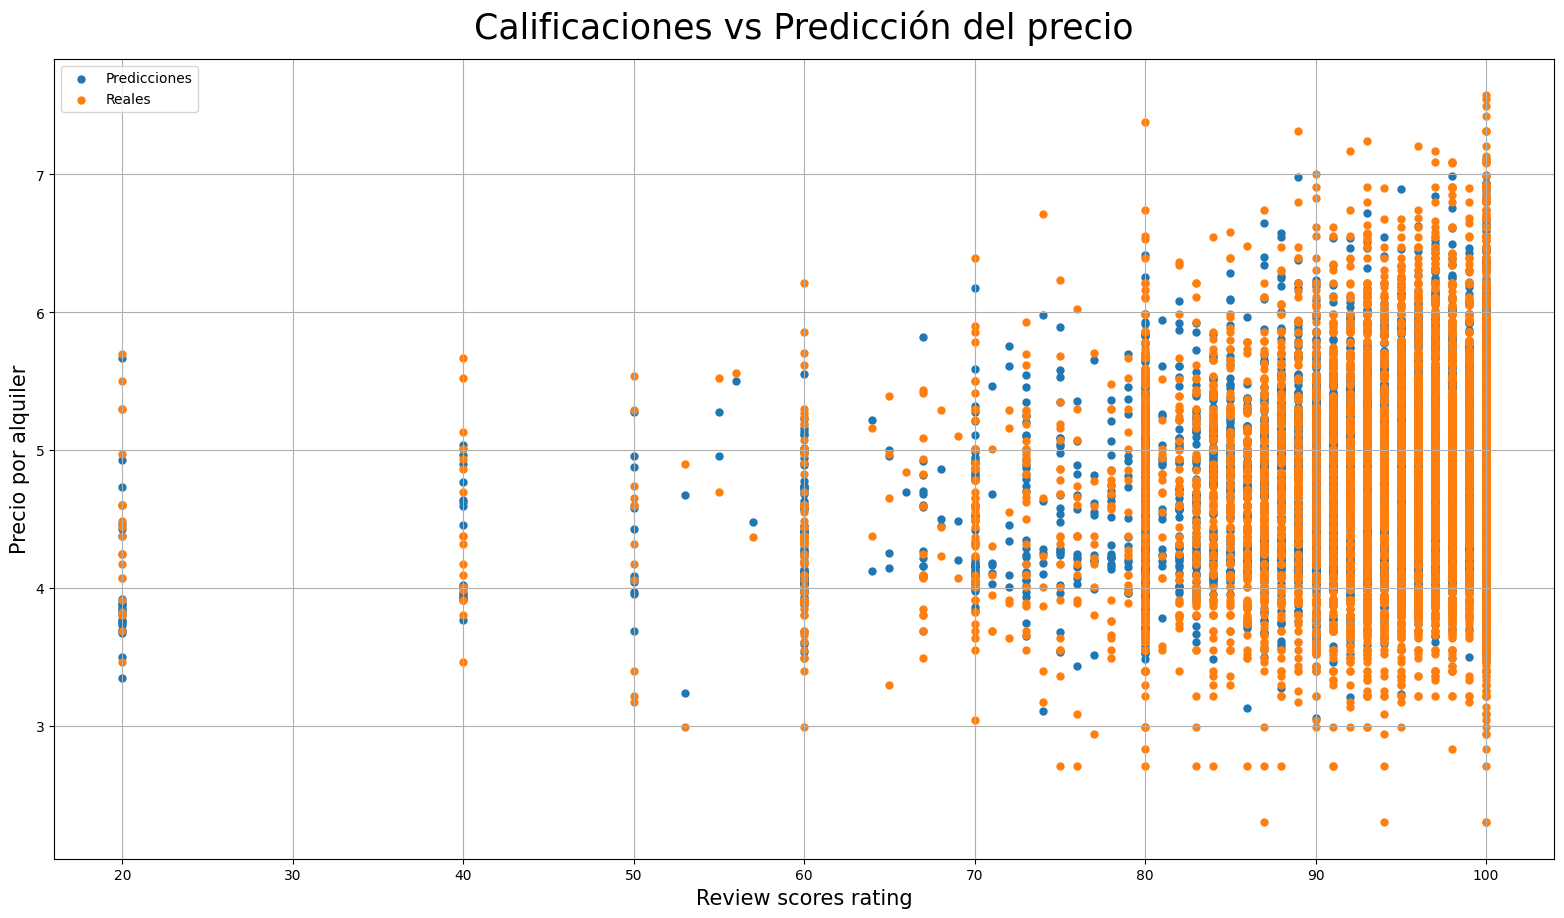

In [67]:
fig = plt.figure(figsize= (15,8))
eje = fig.add_axes([0,0,1,1])
eje.scatter(X_test['review_scores_rating'],Y_pred, s = 25)
eje.scatter(X_test['review_scores_rating'],Y_test, s = 25)
eje.set_title('Calificaciones vs Predicción del precio', fontsize= 25, pad= 15)
eje.set_xlabel('Review scores rating', fontsize = 15)
eje.set_ylabel('Precio por alquiler', fontsize = 15)
eje.legend(['Predicciones','Reales'])
eje.grid(True)

## Precio vs número de calificaciones

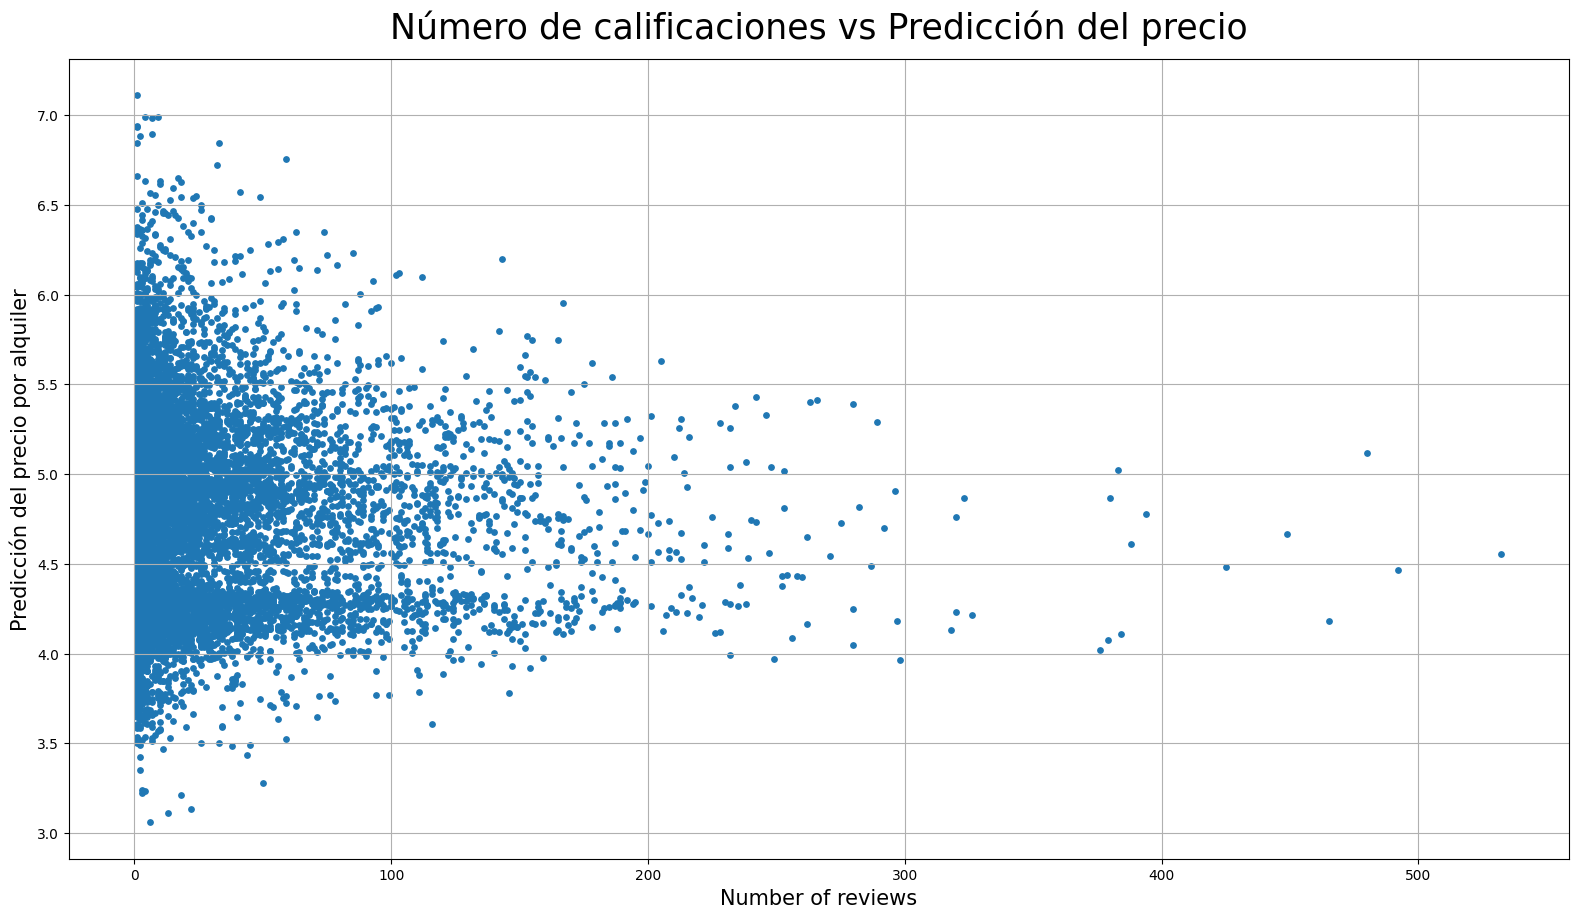

In [68]:
fig = plt.figure(figsize= (15,8))
eje = fig.add_axes([0,0,1,1])
eje.scatter(X_test['number_of_reviews'],Y_pred, s = 15)
eje.set_title('Número de calificaciones vs Predicción del precio', fontsize= 25, pad= 15)
eje.set_xlabel('Number of reviews', fontsize = 15)
eje.set_ylabel('Predicción del precio por alquiler', fontsize = 15)
eje.grid(True)

Comparación con los datos de testeo

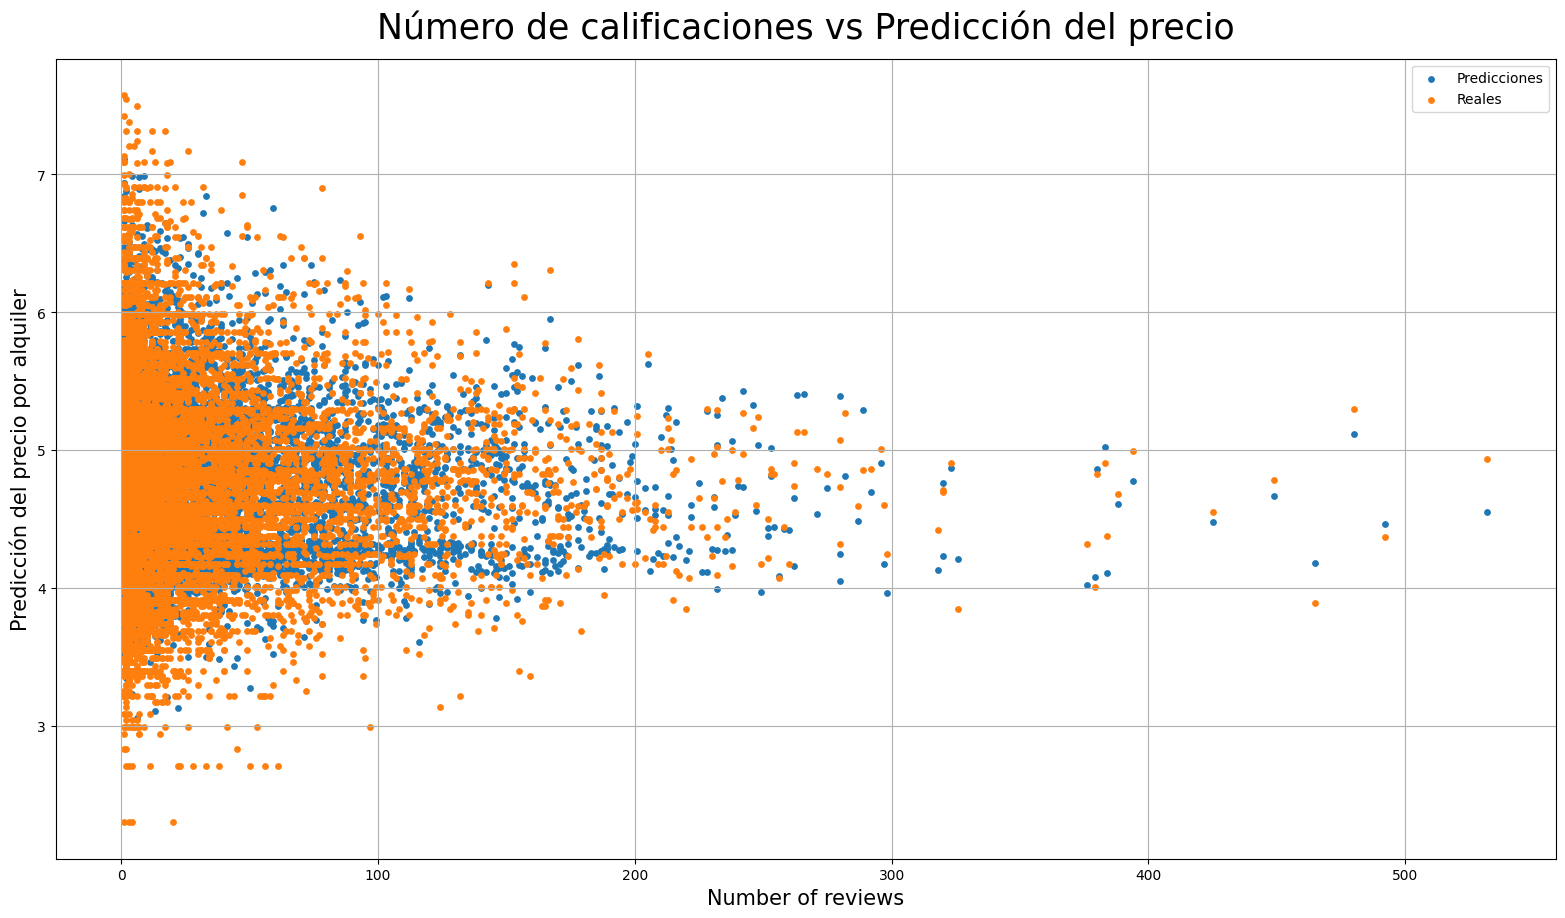

In [69]:
fig = plt.figure(figsize= (15,8))
eje = fig.add_axes([0,0,1,1])
eje.scatter(X_test['number_of_reviews'],Y_pred, s = 15)
eje.scatter(X_test['number_of_reviews'],Y_test, s = 15)
eje.set_title('Número de calificaciones vs Predicción del precio', fontsize= 25, pad= 15)
eje.set_xlabel('Number of reviews', fontsize = 15)
eje.set_ylabel('Predicción del precio por alquiler', fontsize = 15)
eje.legend(['Predicciones','Reales'])
eje.grid(True)

# Evaluación del modelo

Para medir la presición del modelo se emplean los siguientes estadísticos: mean_absolute_error, mean_squared_error y r^2  

In [70]:
mae = mean_absolute_error(Y_test, Y_pred)
mae

0.32549204840949586

In [71]:
mse = mean_squared_error(Y_test, Y_pred)
mse

0.17857374143268367

Se toma la raíz del error cuadrático medio para que sea comparable con los datos

In [72]:
rmse = np.sqrt(mse)
rmse

np.float64(0.4225798639697397)

In [73]:
math.exp(0.3254920484094958), math.exp(0.4225798639697397)

(1.3847118236312461, 1.5258930786159812)

In [74]:
r2 = r2_score(Y_test, Y_pred)
r2

0.6042971399086643

# Conclusiones

El precio del alquiler de una vivienda para Airbnb se aproxima según su histograma a una distribución exponencial. La muestra del precio toma valores desde 1 dolar hasta 2000 dolares con una media de 147.875212 dolares. La ciudad con un alquiler más costoso es San Francisco, teniendo una media superior a los 160 dólares. El alquiler de una casa o apartamento (198.34) supera en más del doble al alquiler de una habitación privada (81) y en cuatro veces al de una habitación compartida (52). Teniendo en cuenta las variables de calificaciones y número de calificaciones se analizó la correlación con el precio. Sin embargo, a partir del gráfico de dispersión no se visualiza una correlación media o fuerte. Finalmente, las medidas de evaluación del modelo marcan una diferencia entre el precio de testeo y su predicción de entre 1.38 y 1.53 dólares. Además, el coeficiente de correlación lineal sugiere una relación media baja entre las variables X y la variable dependiente Y por lo cual cabe considerar construir otro modelo de predicción.